<b><u>Problem Statement</u></b>

Having a refreshing vacation in Bengaluru, you are headed home to Goa. However, due to Covid-19, all
flights from Bengaluru have been cancelled and the only way for you to get home in time is opting for
road transport. Matters have been further complicated by some technical issue with Google maps making
them unavailable for the time being. Your only saving grace is your knowledge of A star algorithm which
will help you create a search agent to find the most optimal path to home. Below is a map of road
connectivity between various cities.<br>

<b>City | Latitude | Longitude</b><br>
<br>
Bengaluru | 12.9716°N | 77.5946°E<br>
Belgaum | 15.8497°N | 74.4977°E<br>
ChorlaGhat | 15.6496°N | 74.1189°E<br>
Hubli | 15.3647°N | 75.1240°E<br>
Dharwad | 15.4589°N | 75.0078°E<br>
Yellapur | 14.9643°N | 74.7121°E<br>
Sirsi | 14.6196°N | 74.8441°E<br>
Ankola | 14.6653°N | 74.3001°E<br>
Goa | 15.2993°N | 74.1240°E<br>

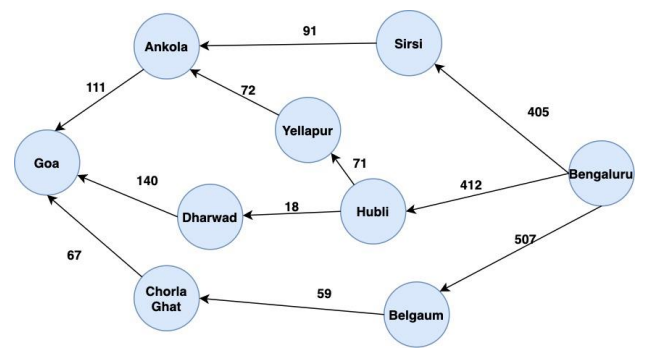

{'Bengaluru': 454, 'Belgaum': 73, 'ChorlaGhat': 38, 'Hubli': 107, 'Dharwad': 96, 'Yellapur': 73, 'Sirsi': 108, 'Ankola': 72, 'Goa': 0}

In [1]:
import math

<b><u>Haversine formula</u></b><br>	
a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)<br>
c = 2 ⋅ atan2(√a,√(1−a))<br>
d = R ⋅ c<br>
where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km)

In [2]:
#Harvesine function to calculate distance between each cities to destination city

def harvesine(lat1, lon1, lat2, lon2):
    
    dis_lat = math.radians(lat2-lat1)
    dis_lon = math.radians(lon2-lon1)
    
    a = pow(math.sin(dis_lat)/2, 2) + (math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * pow(math.sin(dis_lon)/2,2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = 6371 * c
    
    return int(d)

In [3]:
#now lets find the heuristic values for each city to destination city

cities = {'Bengaluru': [12.9716, 77.5946],
         'Belgaum' : [15.8497, 74.4977],
         'ChorlaGhat' : [15.6496, 74.1189],
         'Hubli' : [15.3647, 75.1240],
         'Dharwad' : [15.4589, 75.0078],
         'Yellapur' : [14.9643, 74.7121],
         'Sirsi' : [14.6196, 74.8441],
         'Ankola' : [14.6653, 74.3001],
         'Goa' : [15.2993, 74.1240]}

heuristics = {}

for key in cities:
    heuristics[key] = harvesine(cities[key][0], cities[key][1], 15.2993, 74.1240)
    
print(heuristics)

{'Bengaluru': 454, 'Belgaum': 73, 'ChorlaGhat': 38, 'Hubli': 107, 'Dharwad': 96, 'Yellapur': 73, 'Sirsi': 108, 'Ankola': 72, 'Goa': 0}


In [4]:
graph = {'Bengaluru' : [['Belgaum', 507],['Hubli', 412],['Sirsi', 405]],
        'Belgaum' : [['ChorlaGhat', 59]],
        'ChorlaGhat' : [['Goa',67]],
        'Hubli' : [['Yellapur',71],['Dharwad',18]],
        'Dharwad' : [['Goa', 140]],
        'Yellapur' : [['Ankola', 72]],
        'Sirsi' : [['Ankola', 91]],
        'Ankola' : [['Goa', 111]]}

cost = {'Bengaluru': 0} 

In [5]:
def AStarSearch():
    global tree, heuristic
    closed = []             # closed nodes
    opened = [['Bengaluru', 454]]     # opened nodes

    '''find the visited nodes'''
    while True:
        fn = [i[1] for i in opened]     # fn = f(n) = g(n) + h(n)
        chosen_index = fn.index(min(fn))
        node = opened[chosen_index][0]  # current node
        closed.append(opened[chosen_index])
        del opened[chosen_index]
        if closed[-1][0] == 'Goa':        # break the loop if node G has been found
            break
        
        for item in graph[node]:
            if item[0] in [closed_item[0] for closed_item in closed]:
                continue
                
            if (item[0] not in cost):
                cost.update({item[0]: cost[node] + item[1]})
            elif cost[item[0]] > cost[node] + item[1]:
                cost.update({item[0]: cost[node] + item[1]})
                            
            fn_node = cost[node] + heuristics[item[0]] + item[1]     # calculate f(n) of current node
            temp = [item[0], fn_node]
            opened.append(temp)                                     # store f(n) of current node in array opened
  
            
    '''find optimal sequence'''
    trace_node = 'Goa'                        # correct optimal tracing node, initialize as node G
    optimal_sequence = ['Goa']                # optimal node sequence
    for i in range(len(closed)-2, -1, -1):
        check_node = closed[i][0]           # current node
        if trace_node in [children[0] for children in graph[check_node]]:
            children_costs = [temp[1] for temp in graph[check_node]]
            children_nodes = [temp[0] for temp in graph[check_node]]

            '''check whether h(s) + g(s) = f(s). If so, append current node to optimal sequence
            change the correct optimal tracing node to current node'''
            if cost[check_node] + children_costs[children_nodes.index(trace_node)] == cost[trace_node]:
                optimal_sequence.append(check_node)
                trace_node = check_node
    optimal_sequence.reverse()              # reverse the optimal sequence

    return closed, optimal_sequence

In [6]:
visited_nodes, optimal_nodes = AStarSearch()
print('visited nodes: ' + str(visited_nodes))
print('optimal nodes sequence: ' + str(optimal_nodes))

visited nodes: [['Bengaluru', 454], ['Sirsi', 513], ['Hubli', 519], ['Dharwad', 526], ['Yellapur', 556], ['Ankola', 568], ['Goa', 570]]
optimal nodes sequence: ['Bengaluru', 'Hubli', 'Dharwad', 'Goa']
